## Softmax Function

In [2]:
import numpy as np

In [3]:
def softmax(a):
    return np.exp(a)/np.sum(np.exp(a))

In [4]:
a=np.array([800,900])
s=softmax(a)

C:\Users\ramku\AppData\Local\Temp\ipykernel_19444\2942892012.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(a)/np.sum(np.exp(a))
C:\Users\ramku\AppData\Local\Temp\ipykernel_19444\2942892012.py:2: RuntimeWarning: invalid value encountered in divide
  return np.exp(a)/np.sum(np.exp(a))


The above error is due to `exp(a)` reaches infinity when `a` is big(like 900, 1000) etc.

The below softmax is a new version.

In [5]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    return exp_a/np.sum(exp_a)

In [6]:
a=np.array([800,900])
s=softmax(a)

In [7]:
s

array([3.72007598e-44, 1.00000000e+00])

## MNIST Dataset

In [18]:
import urllib.request
import gzip
import numpy as np
import pickle
import os

In [40]:
image_size = 28*28
dataset_dir='dataset'
dataset_pkl = 'mnist.pkl'
url_base = 'http://www.jrkwon.com/data/ece5831/mnist/'

In [20]:
key_file = {
    'train_images': 'train-images-idx3-ubyte.gz',
    'train_labels': 'train-labels-idx1-ubyte.gz',
    'test_images':  't10k-images-idx3-ubyte.gz',
    'test_labels':  't10k-labels-idx1-ubyte.gz'
}

In [21]:
key_file['train_images']

'train-images-idx3-ubyte.gz'

In [24]:
pwd

'r:\\University_of_Michigan_Dearborn\\Fall_2024\\ECE-5831-Pattern_Recognition_and_Neural_Networkds-Online\\ece5831-2024\\05-2'

In [37]:
file_name = key_file['train_images']
file_path = url_base + file_name
url_opener = urllib.request.build_opener()
url_opener.addheaders = [('Accept','')]
urllib.request.install_opener(url_opener)

urllib.request.urlretrieve(file_path, dataset_dir+'/'+file_name)

('dataset/train-images-idx3-ubyte.gz',
 <http.client.HTTPMessage at 0x2233e17ed10>)

In [28]:
os.path.exists(dataset_dir+'/'+file_name)

True

In [35]:
def _download(file_name):
    file_path = dataset_dir+'/'+file_name
    if(os.path.exists(file_path)):
        print(f'File: {file_name} already exists')
        return
    print(f'Downloading {file_name}...')
    urllib.request.urlretrieve(url_base+file_name, file_path)
    print('Done')

In [31]:
def _download_all():
    for file_name in key_file.values():
        _download(file_name)

In [36]:
_download_all()

File: train-images-idx3-ubyte.gz already exists
File: train-labels-idx1-ubyte.gz already exists
File: t10k-images-idx3-ubyte.gz already exists
File: t10k-labels-idx1-ubyte.gz already exists


Let's create two functions: `_load_images` & `_load_lables`

In [38]:
def _load_images(file_name):
    with gzip.open(file_name,'rb') as f:
        images = np.frombuffer(f.read(),np.uint8,offset=16)
    images = images.reshape(-1, image_size)

    return images

In [41]:
images = _load_images(dataset_dir+'/'+key_file['test_images'])

In [42]:
images.shape

(10000, 784)

In [43]:
import matplotlib.pyplot as plt

In [56]:
idx = 100

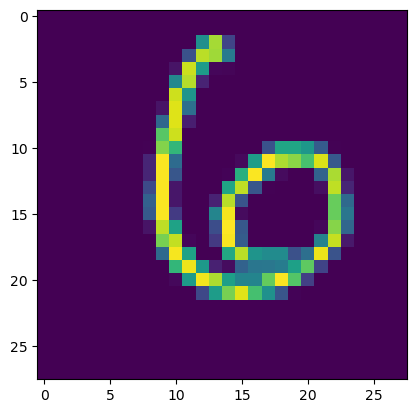

In [57]:
a = images[idx].reshape(28,28)
plt.imshow(a)

In [58]:
def _load_labels(file_name):
    with gzip.open(file_name,'rb') as f:
        labels = np.frombuffer(f.read(),np.uint8,offset=8)
    return labels

In [59]:
labels = _load_labels(f"{dataset_dir}/{key_file['test_labels']}")

In [60]:
labels[idx]

6

In [61]:
def _create_dataset():
    dataset = {}
    dataset['train_images'] = _load_images(f"{dataset_dir}/{key_file['train_images']}")
    dataset['train_labels'] = _load_labels(f"{dataset_dir}/{key_file['train_labels']}")
    dataset['test_images']  = _load_images(f"{dataset_dir}/{key_file['test_images']}")
    dataset['test_labels']  = _load_labels(f"{dataset_dir}/{key_file['test_labels']}")

    with open(f'{dataset_dir}/{dataset_pkl}', 'wb') as f:
        print(f'Pickle: {dataset_dir}/{dataset_pkl} is being created.')
        pickle.dump(dataset, f)
        print('Done.') 
           
    return dataset

In [62]:
dataset = _create_dataset()

Pickle: dataset/mnist.pkl is being created.
Done.


In [67]:
dataset['train_images'][idx]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

Label: 6


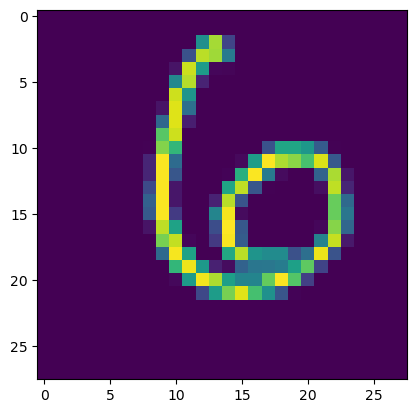

In [64]:
plt.imshow(dataset['test_images'][idx].reshape(28,28))
print(f"Label: {dataset['test_labels'][idx]}")

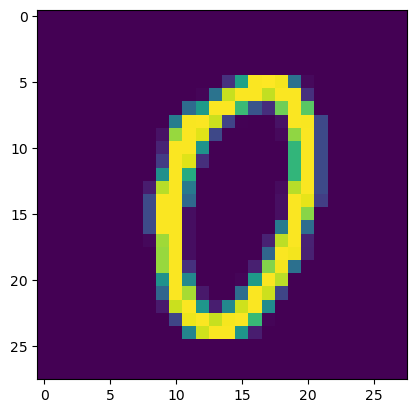

In [73]:
img = dataset['train_images'][1000].reshape(28,28)
plt.imshow(img)

Converts the image identified to a bit array which will have `1` if its corresponding to the array index.

In [75]:
def _change_one_hot_label(y, num_class):
    t = np.zeros((y.size, num_class))
    for idx, row in enumerate(t):
        row[y[idx]] = 1
    
    return t

In [79]:
y = np.array([1,0,9,0,5,8,3,2])
one_hot_y = _change_one_hot_label(y,10)

In [80]:
print(y)
print(one_hot_y)

[1 0 9 0 5 8 3 2]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [81]:
def _init_dataset():
    _download_all()
    if os.path.exists(f'{dataset_dir}/{dataset_pkl}'):
        with open(f'{dataset_dir}/{dataset_pkl}', 'rb') as f:
            print(f'Pickle: {dataset_dir}/{dataset_pkl} already exists.')
            print('Loading...')
            dataset = pickle.load(f)
            print('Done.')
    else:
        dataset = _create_dataset()

    return dataset

In [83]:
dataset = _init_dataset()

File: train-images-idx3-ubyte.gz already exists
File: train-labels-idx1-ubyte.gz already exists
File: t10k-images-idx3-ubyte.gz already exists
File: t10k-labels-idx1-ubyte.gz already exists
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [84]:
dataset['train_images'].shape

(60000, 784)

## MNISTData Class

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import urllib
import gzip
import pickle
import os

In [106]:
class MnistData():
    image_dimensions = (28,28)
    image_size = image_dimensions[0]*image_dimensions[1]
    dataset_dir = 'dataset'
    dataset_pkl = 'mnist_pkl'
    url_base = 'http://jrkwon.com/data/ece5831/mnist/'

    key_file = {
        'train_images': 'train-images-idx3-ubyte.gz',
        'train_labels': 'train-labels-idx1-ubyte.gz',
        'test_images':  't10k-images-idx3-ubyte.gz',
        'test_labels':  't10k-labels-idx1-ubyte.gz'
    }

    def __init__(self):
        self.dataset = {}
        self.dataset_pkl_path = f'{self.dataset_dir}/{self.dataset_pkl}'

        if(os.path.exists(self.dataset_dir) is not True):
            os.mkdir(self.dataset_dir)

        self._init_dataset()

    def _change_one_hot_label(self, y, num_class):
        t = np.zeros((y.size, num_class))
        for idx, row in enumerate(t):
            row[y[idx]] = 1
        
        return t
    
    def _download(self, file_name):
        file_path = self.dataset_dir + '/' + file_name

        if (os.path.exists(file_path)):
            print(f'File: {file_name} already exists.')
            return
        
        print(f'Downloading {file_name}...')

        # to resolve 406 Not Acceptable error
        opener = urllib.request.build_opener()
        opener.addheaders = [('Accept', '')]
        urllib.request.install_opener(opener)

        urllib.request.urlretrieve(self.url_base + file_name, file_path)
        print('Done')


    def _download_all(self):
        for file_name in self.key_file.values():
            self._download(file_name)

    
    def _load_images(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            images = np.frombuffer(f.read(), np.uint8, offset=16)
        images = images.reshape(-1, self.image_size)

        return images
    

    def _load_labels(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)

        return labels

    def _create_dataset(self):
        file_name = f"{self.dataset_dir}/{self.key_file['train_images']}"
        self.dataset['train_images'] = self._load_images(file_name)

        file_name = f"{self.dataset_dir}/{self.key_file['train_labels']}"
        self.dataset['train_labels'] = self._load_labels(file_name)

        file_name = f"{self.dataset_dir}/{self.key_file['test_images']}"
        self.dataset['test_images']  = self._load_images(file_name)

        file_name = f"{self.dataset_dir}/{self.key_file['test_labels']}"
        self.dataset['test_labels']  = self._load_labels(file_name)

        with open(f'{self.dataset_pkl_path}', 'wb') as f:
            print(f'Pickle: {self.dataset_pkl_path} is being created.')
            pickle.dump(self.dataset, f)
            print('Done.') 


    def _init_dataset(self):
        self._download_all()
        if os.path.exists(f'{self.dataset_pkl_path}'):
            with open(f'{self.dataset_pkl_path}', 'rb') as f:
                print(f'Pickle: {self.dataset_pkl_path} already exists.')
                print('Loading...')
                self.dataset = pickle.load(f)
                print('Done.')
        else:
            self._create_dataset()


    def load(self):
        for key in ('train_images', 'test_images'):
            self.dataset[key] = self.dataset[key].astype(np.float32)
            self.dataset[key] /= 255.0

        for key in ('train_labels', 'test_labels'):
            self.dataset[key] = self._change_one_hot_label(self.dataset[key], 10)

        return (self.dataset['train_images'], self.dataset['train_labels']), \
                (self.dataset['test_images'], self.dataset['test_labels'])


In [117]:
mnist_data = MnistData()
(train_images,train_labels),(test_images,test_labels) = mnist_data.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist_pkl already exists.
Loading...
Done.


In [94]:
test_images.shape

(10000, 784)

In [95]:
labels = mnist_data.dataset['test_labels']

In [97]:
labels.shape

(10000, 10)

In [99]:
mnist_data.image_dimensions

(28, 28)

## Testing the Mnist Class

In [128]:
idx1 = np.random.randint(test_images.shape[0], size=1)
idx2 = np.random.randint(test_images.shape[0], size=1)

### For Test Images & Labels

Label (one-hot): [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Label: 6


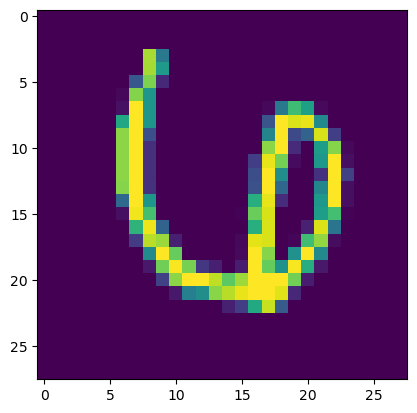

In [129]:
print(f'Label (one-hot): {test_labels[idx1]}')
print(f'Label: {np.argmax(test_labels[idx1])}')
plt.imshow(test_images[idx1].reshape(28,28))

Label (one-hot): [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Label: 5


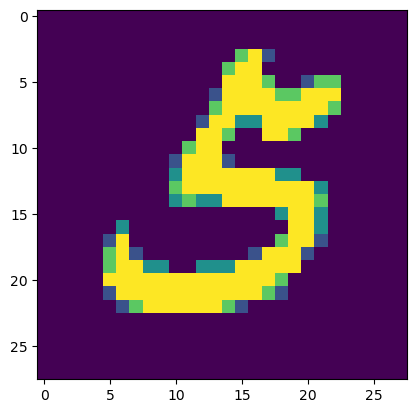

In [130]:
print(f'Label (one-hot): {test_labels[idx2]}')
print(f'Label: {np.argmax(test_labels[idx2])}')
plt.imshow(test_images[idx2].reshape(28,28))


### For Train Images & Labels

Label (one-hot): [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Label: 6


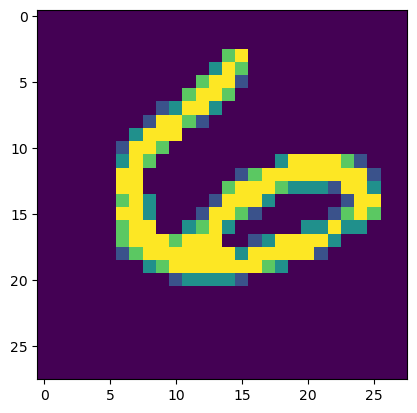

In [133]:

print(f'Label (one-hot): {train_labels[idx1]}')
print(f'Label: {np.argmax(train_labels[idx1])}')
plt.imshow(train_images[idx1].reshape(28,28))

Label (one-hot): [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Label: 3


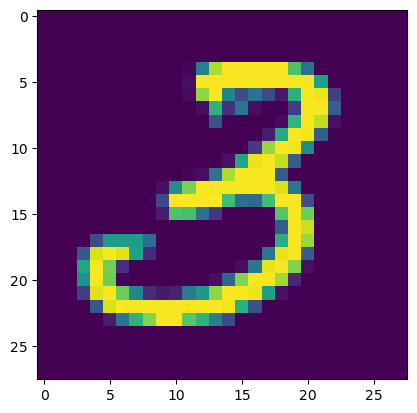

In [134]:
print(f'Label (one-hot): {train_labels[idx2]}')
print(f'Label: {np.argmax(train_labels[idx2])}')
plt.imshow(train_images[idx2].reshape(28,28))
